# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [2]:
import pandas as pd

# Load the dataset
file_path = 'data/vehicles.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and the data types of each column
data.head(), data.dtypes


(           id                  region  price  year manufacturer model  \
 0  7222695916                prescott   6000   NaN          NaN   NaN   
 1  7218891961            fayetteville  11900   NaN          NaN   NaN   
 2  7221797935            florida keys  21000   NaN          NaN   NaN   
 3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
 4  7210384030              greensboro   4900   NaN          NaN   NaN   
 
   condition cylinders fuel  odometer title_status transmission  VIN drive  \
 0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 
   size type paint_color state  
 0  NaN  NaN         NaN    az  
 1  NaN  NaN      

I'll follow the CRISP-DM process which involves the following stages:

- Business Understanding: Define objectives and requirements from a business perspective.
- Data Understanding: Initial data collection, data familiarization, and detecting data quality issues.
- Data Preparation: Clean and prepare the data for modeling.
- Modeling: Analyze the data to discover patterns and relationships.
- Evaluation: Evaluate the model to ensure it meets the business objectives.
- Deployment: Implement the model and provide results in a report format.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

The dataset contains various attributes about vehicles, including year, manufacturer, model, condition, and more. Here’s a quick summary of the data types and a peek at the first few rows:

- id: Identifier for the car (integer)
- region: Geographic region where the car is listed (object/string)
- price: Listing price of the car (integer)
- year: Year of manufacture (float)
- manufacturer: Car manufacturer (object/string)
- model: Car model (object/string)
- condition: Condition of the car (object/string)
- cylinders: Engine cylinders (object/string)
- fuel: Type of fuel the car uses (object/string)
- odometer: Mileage of the car (float)
- title_status: Legal status of the car’s title (object/string)
- transmission: Type of transmission (object/string)
- VIN: Vehicle Identification Number (object/string)
- drive: Type of drive (object/string)
- size: Size category of the car (object/string)
- type: Body type of the car (object/string)
- paint_color: Color of the car (object/string)
- state: State where the car is listed (object/string)

**Observations:**
- There are missing values in several important columns such as year, manufacturer, and model.
- Data types seem appropriate for most fields, though numeric fields like year and odometer are represented as floats which is typical for handling NaN values.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [4]:
# Check for missing values in each column
missing_data = data.isnull().sum()

# Calculate the percentage of missing data for each column
missing_percentage = (missing_data / len(data)) * 100

missing_percentage.sort_values(ascending=False)


size            71.767476
cylinders       41.622470
condition       40.785232
VIN             37.725356
drive           30.586347
paint_color     30.501078
type            21.752717
manufacturer     4.133714
title_status     1.930753
model            1.236179
odometer         1.030735
fuel             0.705819
transmission     0.598763
year             0.282281
id               0.000000
region           0.000000
price            0.000000
state            0.000000
dtype: float64

Here are the columns with significant amounts of missing data:

- size: 71.77% missing
- cylinders: 41.62% missing
- condition: 40.79% missing
- VIN: 37.73% missing
- drive: 30.59% missing
- paint_color: 30.50% missing
- type: 21.75% missing

Given the high proportion of missing data in some of these fields, particularly size and VIN, it might be reasonable to exclude these from the analysis unless they are directly pertinent to our study of factors influencing price.

- Exclude size and VIN from analysis due to the high level of missing data.
- For year, manufacturer, and model which have lower levels of missing data but are critical for pricing analysis, remove rows where this data is missing.
- For odometer, fuel, and transmission, consider imputation where feasible.
- Columns like condition, cylinders, drive, paint_color, and type could be left with missing categories or imputed based on distributions, depending on their relevance to price analysis.


In [6]:
# Drop columns with high missing values
data_cleaned = data.drop(columns=['size', 'VIN'])

# Drop rows where 'year', 'manufacturer', and 'model' are missing
data_cleaned = data_cleaned.dropna(subset=['year', 'manufacturer', 'model'])

# Display the remaining missing data percentages for inspection
remaining_missing = data_cleaned.isnull().sum() / len(data_cleaned) * 100
remaining_missing.sort_values(ascending=False)


cylinders       41.322459
condition       40.676699
paint_color     30.004208
drive           29.929211
type            20.808871
title_status     1.910301
odometer         1.023959
fuel             0.631899
transmission     0.562101
id               0.000000
region           0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
state            0.000000
dtype: float64

After removing rows with missing year, manufacturer, and model, here's the updated state of missing data:

- cylinders: 41.32% missing
- condition: 40.68% missing
- paint_color: 30.00% missing
- drive: 29.93% missing
- type: 20.81% missing


**Further Data Cleaning**

Impute missing values for odometer, fuel, and transmission since these have lower missing rates and are relevant to car valuation.

Handle categorical data with high missingness: For cylinders, condition, drive, paint_color, and type, we'll evaluate whether to impute based on the most common category, or treat missing as a separate category, depending on the distribution and potential impact on car prices.

Outlier Handling: We need to address outliers in the price and potentially odometer fields.


Feature Engineering: We may need to derive new features or modify existing ones (e.g., vehicle age from year).

Data Type Adjustments: Convert data types where necessary, for example, converting year from float to integer after handling missing values.

In [8]:
# Impute odometer with median
data_cleaned['odometer'] = data_cleaned['odometer'].fillna(data_cleaned['odometer'].median())

# Impute fuel and transmission with the mode (most common value)
for column in ['fuel', 'transmission']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column] = data_cleaned[column].fillna(mode_value)

# Check the updated state of missing data
updated_missing = data_cleaned.isnull().sum() / len(data_cleaned) * 100
updated_missing.sort_values(ascending=False)


cylinders       41.322459
condition       40.676699
paint_color     30.004208
drive           29.929211
type            20.808871
title_status     1.910301
id               0.000000
region           0.000000
price            0.000000
year             0.000000
manufacturer     0.000000
model            0.000000
fuel             0.000000
odometer         0.000000
transmission     0.000000
state            0.000000
dtype: float64

In [9]:
# Impute missing values for 'year' and 'odometer' using the median
data_cleaned['odometer'].fillna(data_cleaned['odometer'].median(), inplace=True)

In [11]:
# Create a new column 'vehicle_age' to represent the age of the vehicle from the current year (2023)
data_cleaned['vehicle_age'] = 2023 - data_cleaned['year'].astype(int)

In [13]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404020 entries, 27 to 426879
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            404020 non-null  int64  
 1   region        404020 non-null  object 
 2   price         404020 non-null  int64  
 3   year          404020 non-null  float64
 4   manufacturer  404020 non-null  object 
 5   model         404020 non-null  object 
 6   condition     239678 non-null  object 
 7   cylinders     237069 non-null  object 
 8   fuel          404020 non-null  object 
 9   odometer      404020 non-null  float64
 10  title_status  396302 non-null  object 
 11  transmission  404020 non-null  object 
 12  drive         283100 non-null  object 
 13  type          319948 non-null  object 
 14  paint_color   282797 non-null  object 
 15  state         404020 non-null  object 
 16  vehicle_age   404020 non-null  int64  
dtypes: float64(2), int64(3), object(12)
memory usage: 55

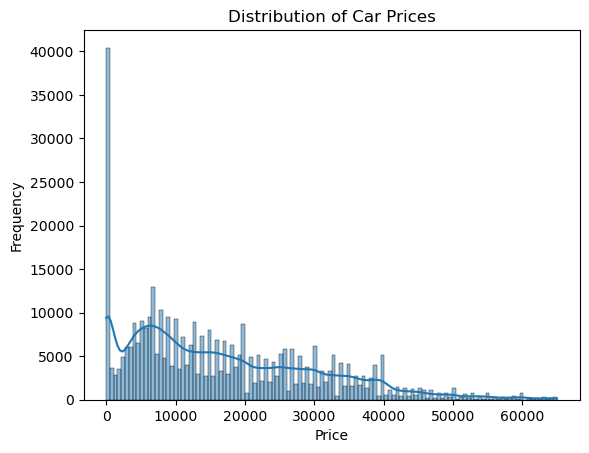

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out extreme outliers in the 'price' column based on quantiles
data_filtered = data_cleaned[data_cleaned['price'].between(data_cleaned['price'].quantile(0.01), data_cleaned['price'].quantile(0.99))]

# Plotting the distribution of 'price' after removing extreme outliers
sns.histplot(data_filtered['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


The histogram above shows the distribution of car prices after removing the extreme outliers based on the 1st and 99th percentiles. This helps us focus on a more realistic range of prices for most used cars.

In [27]:
data_filtered.to_csv('data_cleaned.csv')

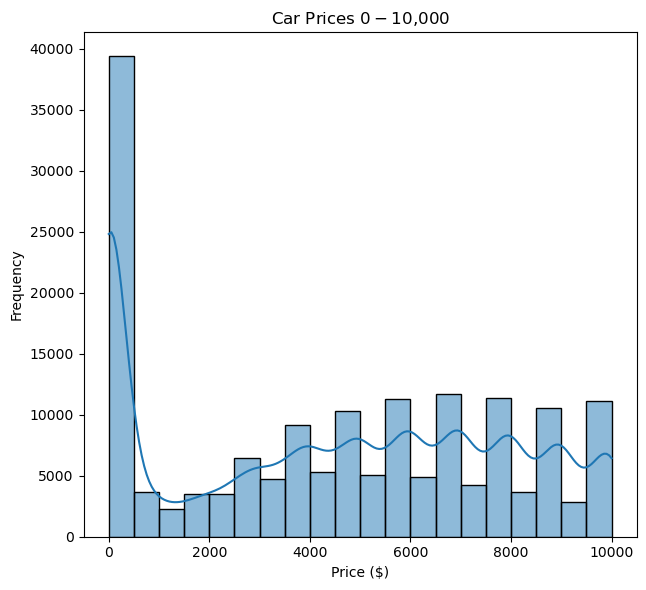

In [28]:
# Creating histograms to observe the distribution of prices within specific price ranges
plt.figure(figsize=(18, 6))

# Histogram for prices in the range $0 - $10,000
plt.subplot(1, 3, 1)
sns.histplot(data_filtered[data_filtered['price'] <= 10000]['price'], bins=20, kde=True)
plt.title('Car Prices $0 - $10,000')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


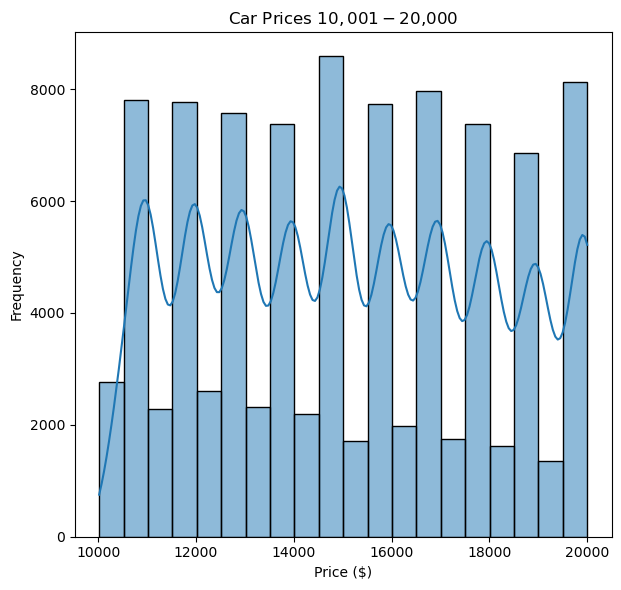

In [29]:
# Creating histograms to observe the distribution of prices within specific price ranges
plt.figure(figsize=(18, 6))

# Histogram for prices in the range $10,001 - $20,000
plt.subplot(1, 3, 2)
sns.histplot(data_filtered[(data_filtered['price'] > 10000) & (data_filtered['price'] <= 20000)]['price'], bins=20, kde=True)
plt.title('Car Prices $10,001 - $20,000')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


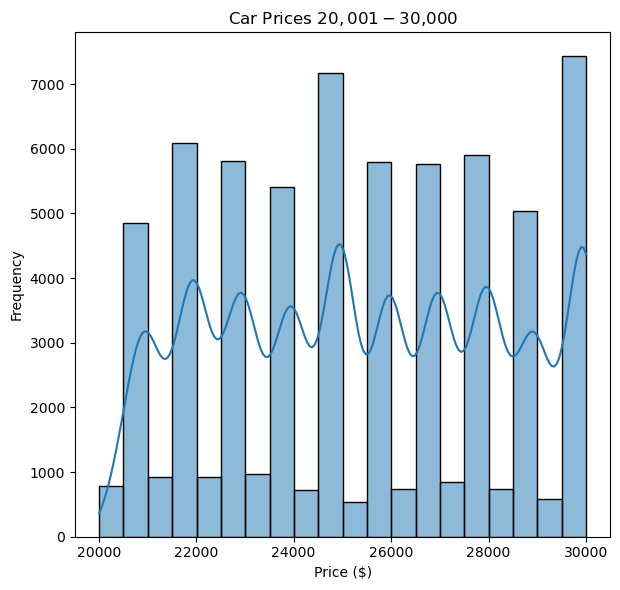

In [30]:
# Creating histograms to observe the distribution of prices within specific price ranges
plt.figure(figsize=(18, 6))

# Histogram for prices in the range $20,001 - $30,000
plt.subplot(1, 3, 3)
sns.histplot(data_filtered[(data_filtered['price'] > 20000) & (data_filtered['price'] <= 30000)]['price'], bins=20, kde=True)
plt.title('Car Prices $20,001 - $30,000')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


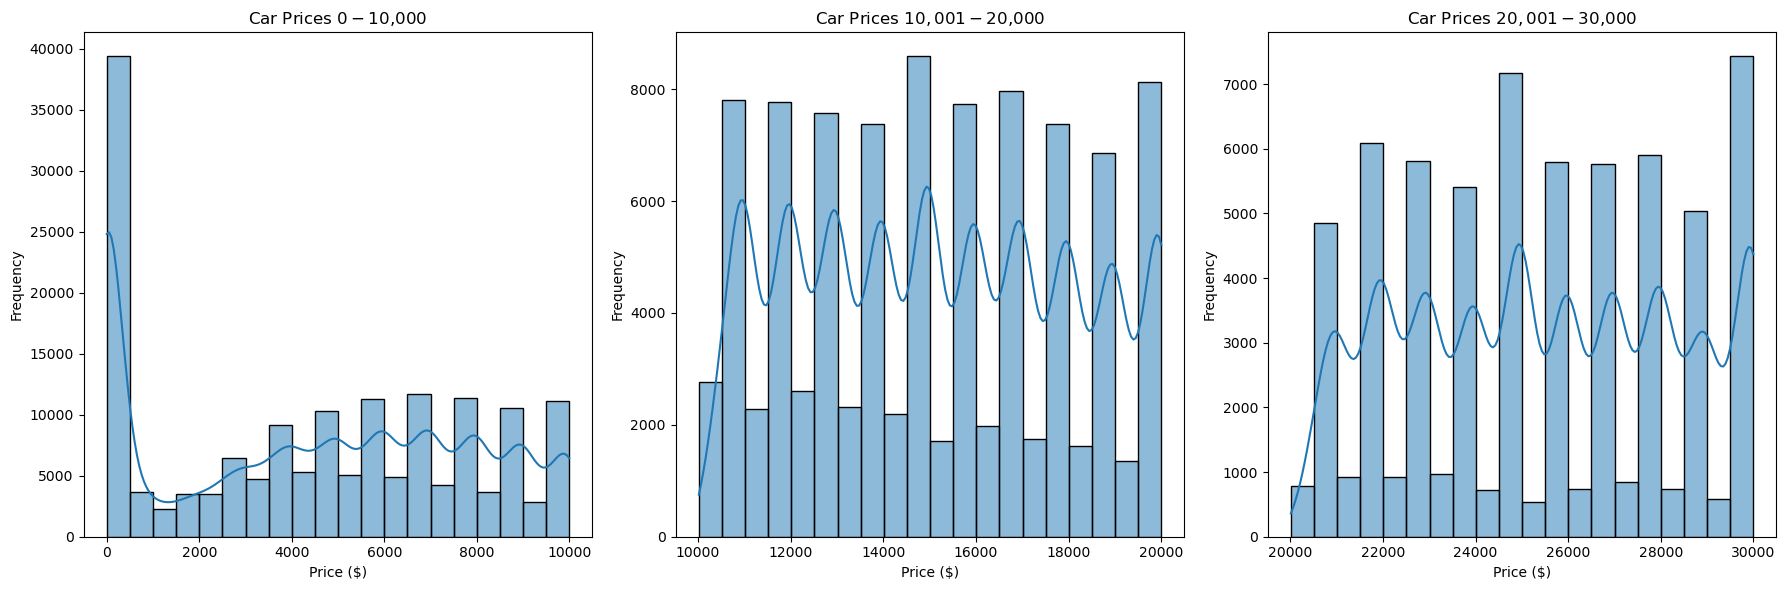

In [22]:
# Creating histograms to observe the distribution of prices within specific price ranges
plt.figure(figsize=(18, 6))

# Histogram for prices in the range $0 - $10,000
plt.subplot(1, 3, 1)
sns.histplot(data_filtered[data_filtered['price'] <= 10000]['price'], bins=20, kde=True)
plt.title('Car Prices $0 - $10,000')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

# Histogram for prices in the range $10,001 - $20,000
plt.subplot(1, 3, 2)
sns.histplot(data_filtered[(data_filtered['price'] > 10000) & (data_filtered['price'] <= 20000)]['price'], bins=20, kde=True)
plt.title('Car Prices $10,001 - $20,000')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

# Histogram for prices in the range $20,001 - $30,000
plt.subplot(1, 3, 3)
sns.histplot(data_filtered[(data_filtered['price'] > 20000) & (data_filtered['price'] <= 30000)]['price'], bins=20, kde=True)
plt.title('Car Prices $20,001 - $30,000')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Here are the histograms showing the distribution of car prices within specific price ranges:

**Car Prices $0 - $10,000:**
This range includes a high frequency of cars, indicating a large market for budget vehicles. The distribution is fairly uniform across this range, showing a consistent demand for cars at various price points within the budget segment.

**Car Prices $10,001 - $20,000:**
This price range is also popular, representing a mid-range market segment. The histogram peaks slightly above $15,000, suggesting a concentration of sales around this price point.

**Car Prices $20,001 - $30,000:**
The distribution in this range is somewhat less dense compared to the lower price ranges, indicating fewer transactions but still significant activity in the near-luxury car market.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Let's begin by exploring the relationships between various features and the car prices:

Statistical summary of numerical attributes: To get a sense of the distribution of prices, mileage (odometer), age, etc.
Visualization of price relationships: Using scatter plots, histograms, and box plots to understand how price varies with age, mileage, and condition.
Correlation analysis: To see how strongly different numerical features are related to price.

## Statistical Summary of Numerical Attributes ##
Here's a summary of the numerical attributes in the dataset:

- Price: The average selling price is approximately $16,771, with prices ranging from $0 (likely erroneous or placeholder values) to  $64,999.

- Year: The average manufacturing year is 2011, but the dataset contains cars as old as 1900.
- Odometer: The average mileage is around 96,730 miles, with a wide range from 0 (new or incorrectly entered) to 10,000,000 miles (likely erroneous).
- Vehicle Age: The average age of vehicles is about 11 years, ranging up to 123 years (which aligns with the oldest cars from 1900).


Exploratory Visual Analysis
To better understand how various features like vehicle age, odometer, and condition impact car prices, I will generate:

- Histograms for price distribution to identify typical price ranges.
- Scatter plots of price against year, odometer, and vehicle age to observe trends and patterns.
- Box plots to see the price variation with categorical variables like manufacturer and condition.

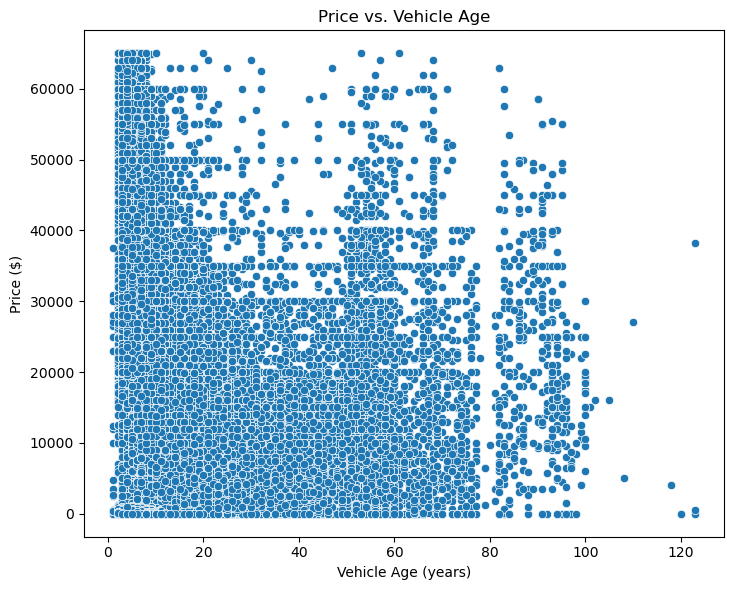

In [23]:
# Creating scatter plots for price vs. vehicle age and odometer reading
plt.figure(figsize=(14, 6))

# Price vs. Vehicle Age
plt.subplot(1, 2, 1)
sns.scatterplot(data=data_filtered, x='vehicle_age', y='price')
plt.title('Price vs. Vehicle Age')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()


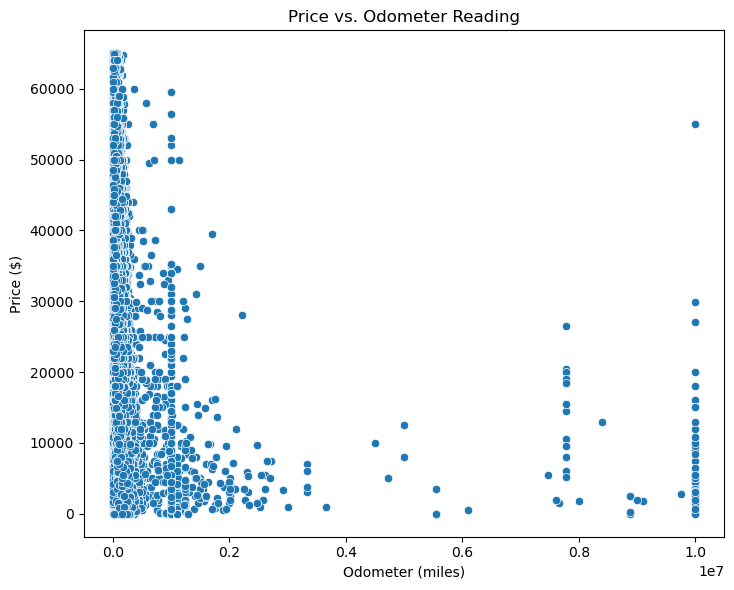

In [24]:
# Creating scatter plots for price vs. vehicle age and odometer reading
plt.figure(figsize=(14, 6))

# Price vs. Odometer
plt.subplot(1, 2, 2)
sns.scatterplot(data=data_filtered, x='odometer', y='price')
plt.title('Price vs. Odometer Reading')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()


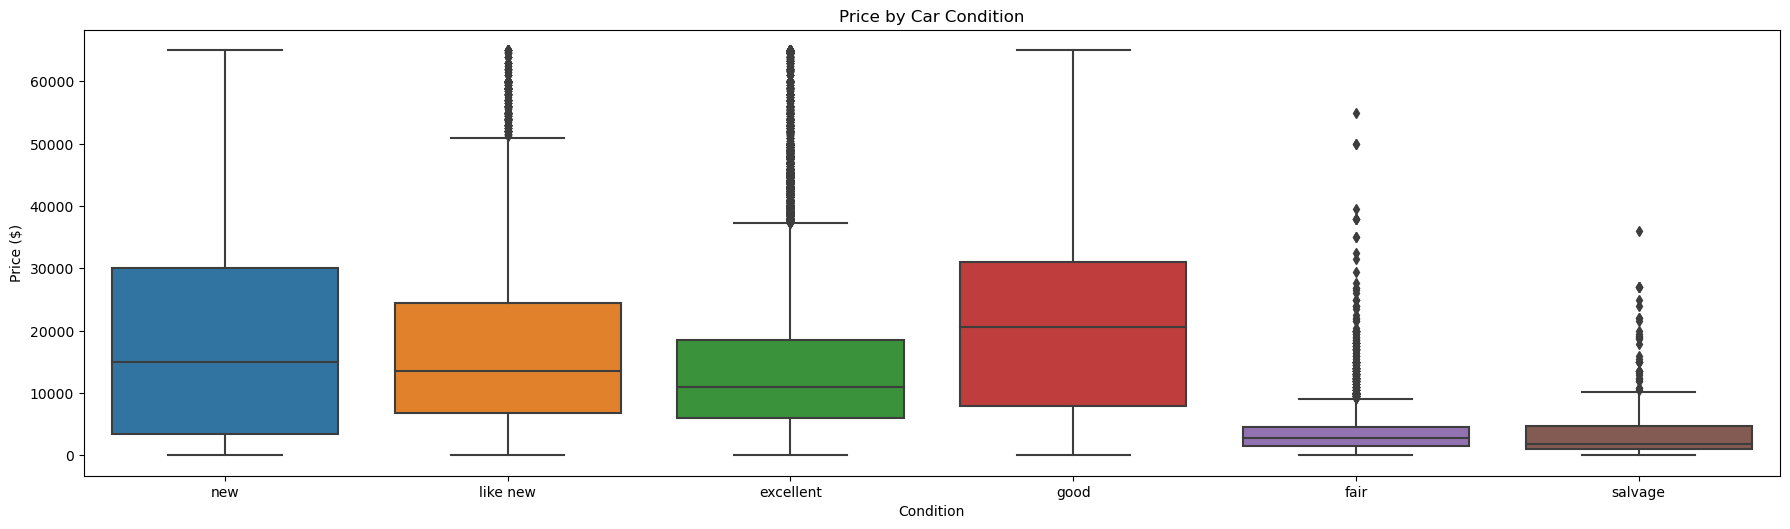

In [25]:
# Creating box plots for price by car condition and manufacturer (top 10 by volume)

# Filtering data for better visualization
top_manufacturers = data_filtered['manufacturer'].value_counts().head(10).index

plt.figure(figsize=(18, 10))

# Price by Car Condition
plt.subplot(2, 1, 1)
sns.boxplot(data=data_filtered, x='condition', y='price', order=['new', 'like new', 'excellent', 'good', 'fair', 'salvage'])
plt.title('Price by Car Condition')
plt.xlabel('Condition')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()


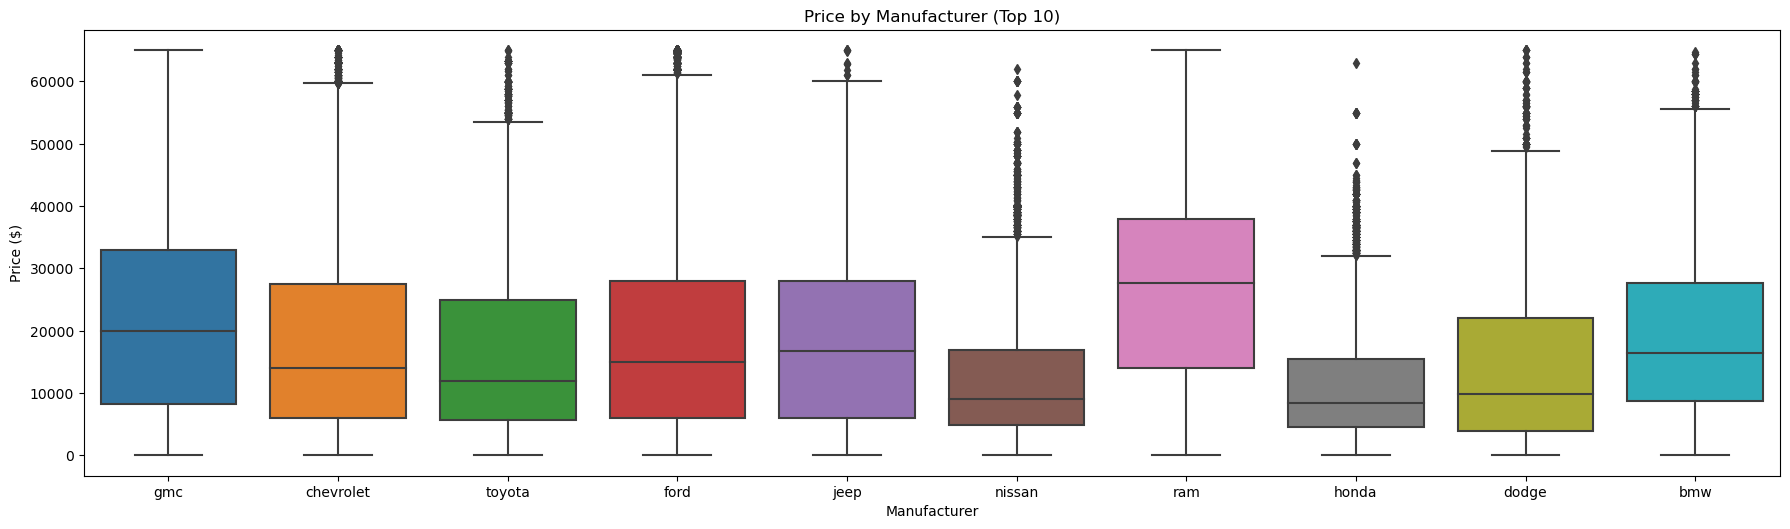

In [26]:
# Creating box plots for price by car condition and manufacturer (top 10 by volume)

# Filtering data for better visualization
top_manufacturers = data_filtered['manufacturer'].value_counts().head(10).index

plt.figure(figsize=(18, 10))

# Price by Manufacturer
plt.subplot(2, 1, 2)
sns.boxplot(data=data_filtered[data_filtered['manufacturer'].isin(top_manufacturers)], x='manufacturer', y='price')
plt.title('Price by Manufacturer (Top 10)')
plt.xlabel('Manufacturer')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.